# White Noise
### Arif Nurwahid
Seminar on 20 Dec 2022



---

### Definition 1
A time series $\{W_t\}$ is called a White Noise series (purely random series) if it satisfies the following condition:
1. For all $t$, $E(W_t)=\mu$ is constant
2. For all $t$, $Var(W_t)=\sigma^2$ is constant
3. It is uncorrelated at different time points, i.e. when $t\ne s, Cov(W_t,W_s)=0$

The concept of white noise is essential for time series analysis and forecasting. Two main reasons:
1. __Predictability__: If a time series is white noise, then, by definition, it is random. We cannot reasonably model it and make predictions.
2. __Model Diagnostics__: The series of errors from a time series forecast model should ideally be white noise.

The White Noise refrects information that is not observable and is sometimes called an _innovation term (series)_.

### Notion
We denote White Noise as $W_t ~ WN(\mu,\sigma^2_w)$, or:
- $W_t \sim iid(\mu,\sigma^2_w)$ if independent and identically distributed
- $W_t \sim iidN(\mu,\sigma^2_w)$ if the distribution is normal (Gaussian)

Without loss of generality, we usually assume that $E(W_t)=\mu=0$.

### Example 1
Firstly, we can create a list of 1000 random Gaussian variables using the gauss() function from the random module.
We will draw variables from a Gaussian distribution with a mean ($\mu$) of 0.0 and a standard deviation ($\sigma$) of 1.0.

In [9]:
from random import gauss
from random import seed
from pandas import Series
import numpy as np
import pandas as pd

In [13]:
from pandas.plotting import autocorrelation_plot as acp
from PythonTsa.plot_acf_pacf import acf_pacf_fig as apf
import matplotlib.pyplot as pyplot

# seed random number generator
seed(1)

# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

# summary stats
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


We can see that the mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample.

Here we can create some plots, starting with a line plot of the series and we can see that it appears that the series is random.

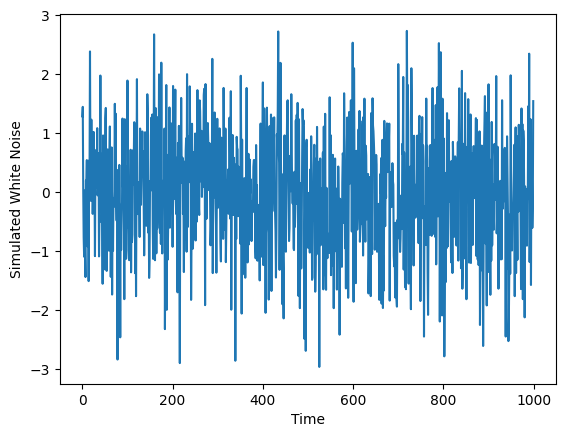

In [14]:
# line plot
series.plot()
pyplot.xlabel('Time')
pyplot.ylabel('Simulated White Noise')
pyplot.show()

We can also create a histogram and confirm the distribution is Gaussian. We can expect that the histogram shows the bell-curve shape.

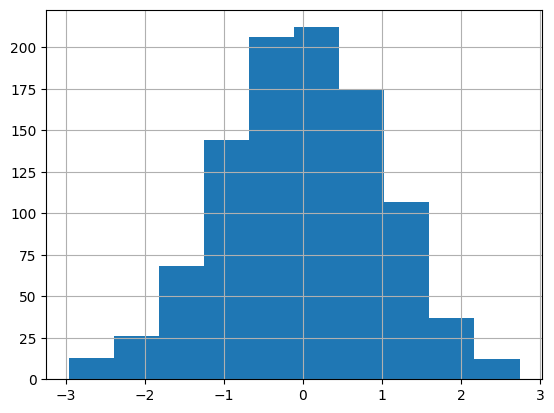

In [5]:
# histogram plot
series.hist()
pyplot.show()

Lastly, we can create a correlogram and check for any autocorrelation with lag variables.

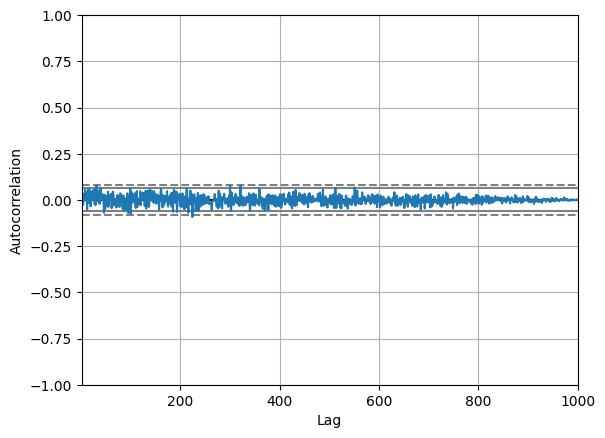

In [6]:
# autocorrelation up to lag 1000 using Pandas Plotting
acp(series)
pyplot.show()

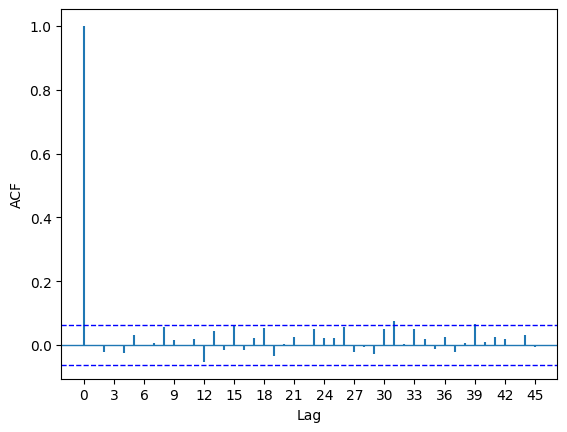

In [7]:
# autocorrelation up to lag 45 using PythonTsa
apf(series, both=False, lag=45)
pyplot.show()

---

### White Noise Test

For a stationary time series, it is a White Noise iff its autocorrelation function $\rho_k=0$ for any integer $k\ne 0$. Here we will focus on portmanteau (Q) test for Ljung-Box test statistic as follow:

$Q_{LB}(m)=n(n+1)\displaystyle\sum_{k=1}^m \frac{r^2_k}{n-k}$

Note that under the null hypothesis, for every integer $1\le m < T$, the $p$-value for $Q_{LB}(m)$ should be greater than $5\%$ (the level of significant).

### Example 2 (Quarterly GDP of Education Sector in Indonesia From 2010 to 2022 in Billions of Rp. Unit)
This time series $\{X_t\}$ is the quarterly GDP of Edu Sector from 2010 to 2022 in Indonesia. [Source from Bank Indonesia Website](https://www.bi.go.id/id/statistik/sdds/Default.aspx#fiscal-sector-section)

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


NameError: name 'acf_pacf_fig' is not defined

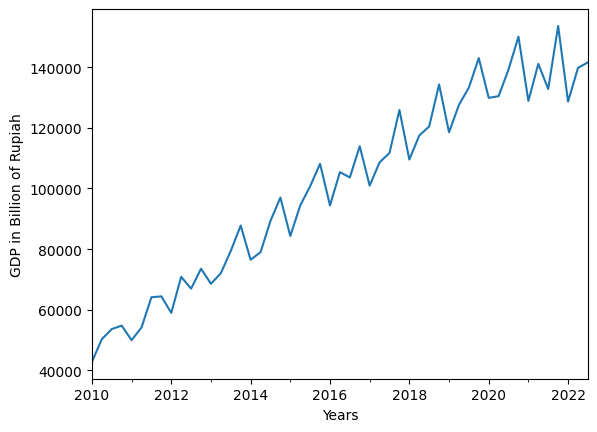

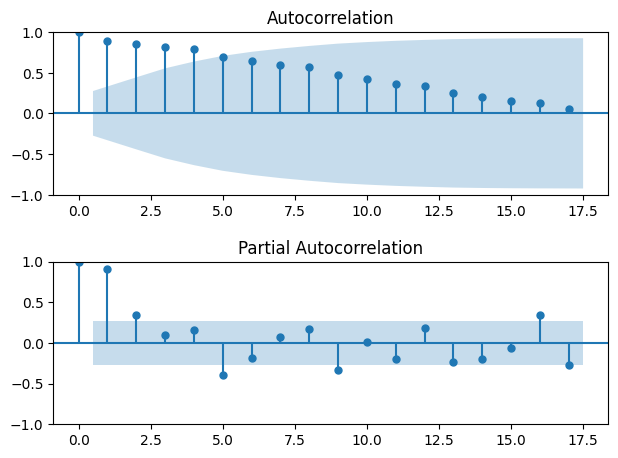

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

x = pd.read_table('gdpedu.txt', header=0)
dates = pd.date_range('2010', periods = len(x), freq = 'Q')
x.index = dates; 
xts = pd.Series(x['gdpedu'])
xts.plot(); 
pyplot.xlabel('Years')
pyplot.ylabel('GDP in Billion of Rupiah');


# The following is to plot ACF and PACF using statsmodels
fig = pyplot.figure()
plot_acf(xts, lags = 17, ax = fig.add_subplot(2, 1, 1))
plot_pacf(xts, lags = 17, ax = fig.add_subplot(2, 1, 2))
fig.tight_layout(pad = 1.5);

# The following is to plot ACF and PACF using PythonTsa
acf_pacf_fig(xts, both = True, lag = 17)

From the time series plot and the ACF plot, it is clear that the time series data is nonstationary.

Here we will try to take logatithms on $\{X_t\}$. Thus we obtain the logarithm time series of the GDP $\{log(X_t)\}$.

In [ ]:
logGdp = np.log(xts)
logGdp.plot()
pyplot.title('Logarithm of GDP in Edu Sector')
pyplot.ylabel('log(GDP)')
pyplot.show()
apf(logGdp, lag=25)
pyplot.show()

As we can see that by taking the log of time series data, we still get the nonstationary series. Let us take a new action as below.

#### Differencing the $log(X_t)$
By taking the difference of $log(X_t)$, suppose $Y_t=log(X_t)-log(X_{t-1})$. Then we will produce time series plot and its ACF.

In [ ]:
dlogGdp = logGdp.diff(1)
dlogGdp=dlogGdp.dropna() #delete "NaN"
dlogGdp.plot()
pyplot.title('Difference of Logarithm of GDP in Edu Sector')
pyplot.show()
apf(dlogGdp, lag=25)
pyplot.show()

The time series plot is quite stationary, however by looking at its ACF plot, we cannot say that it is a white noise series. 

Let us try double differencing at $log(X_t)$

#### Double Differencing the $log(X_t)$
By taking the double difference of $log(X_t)$, suppose $Z_t=Y_t-Y_{t-1}$. Then we will produce time series plot and its ACF.

In [ ]:
ddlogGdp=dlogGdp.diff(1)
ddlogGdp=ddlogGdp.dropna() #delete "NaN"
ddlogGdp.plot()
pyplot.title('Double Difference of Logarithm of GDP in Edu Sector')
pyplot.show()
apf(ddlogGdp, both=False, lag=25)
pyplot.show()

Here we still cannot say that the new time series as a white noise. Then, (maybe) we need to try another approach to get possibility in order to get the new data as white noise.

In [16]:
xts.head()

2010-03-31    42816.8
2010-06-30    50312.9
2010-09-30    53634.4
2010-12-31    54795.4
2011-03-31    49989.0
Freq: Q-DEC, Name: gdpedu, dtype: float64